In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
 
import tensorflow as tf
from sklearn.metrics import r2_score
 
from sklearn import preprocessing, model_selection 
 
from keras import layers, optimizers, regularizers
from keras.layers import Dense, Dropout, BatchNormalization, Activation
 
#outliers removal test
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [ ]:
file_name = "/content/drive/MyDrive/Data analytics course/winequalityN.csv"
df = pd.read_csv(file_name)
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
df.groupby("type").size()

type
red      1599
white    4898
dtype: int64

#Split in 2 datasets: white and red wine

In [ ]:
red_wine_df = df[df["type"] == "red"].dropna()

In [ ]:
red_wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4898,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4899,red,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
4900,red,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4901,red,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4902,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
white_wine_df = df[df["type"] == "white"].dropna()

In [ ]:
white_wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,white,5.7,0.21,0.32,0.9,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6
4893,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4896,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


#White wine visuals & ANN

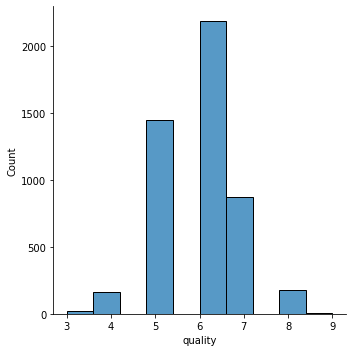

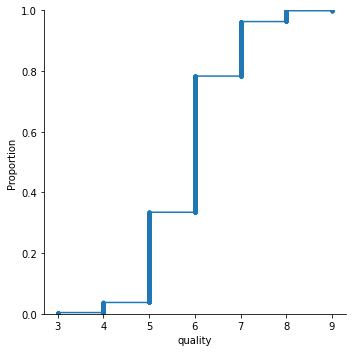

In [ ]:
sns.displot(white_wine_df["quality"], bins=10)
sns.displot(white_wine_df, x="quality", kind="ecdf", marker='.')

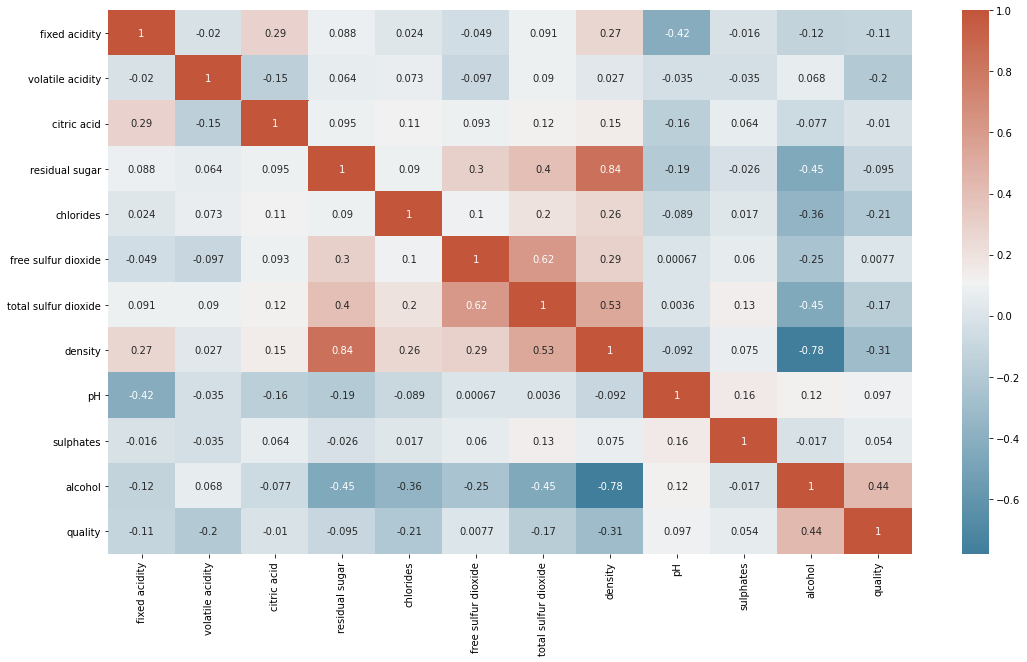

In [ ]:
plt.figure(figsize=(18, 10))

sns.heatmap(white_wine_df.corr(),annot=True, cmap=sns.diverging_palette(230, 20, as_cmap=True))

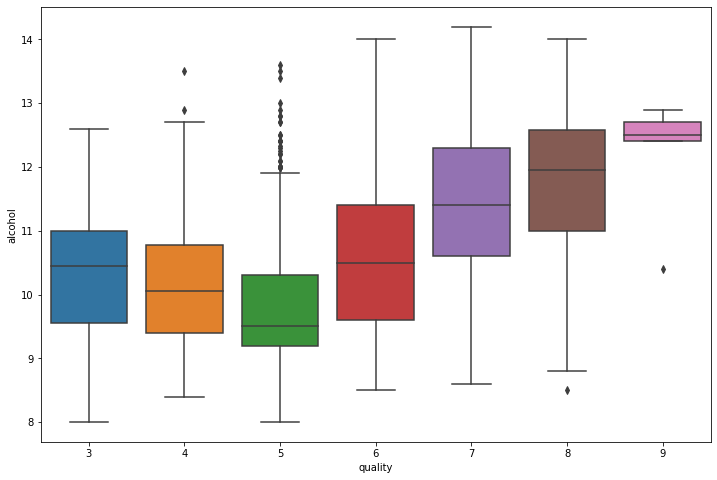

In [ ]:
#check alcohol vs quality
plt.figure(figsize=(12, 8))

sns.boxplot(data=white_wine_df, y="alcohol", x="quality")

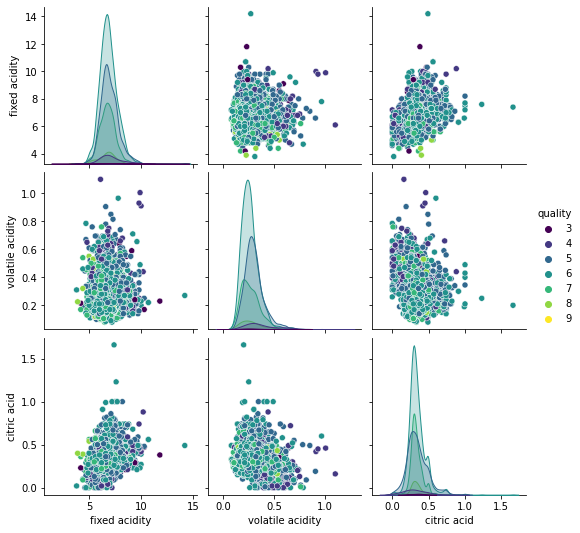

In [ ]:
sns.pairplot(data=white_wine_df, vars=["fixed acidity", "volatile acidity","citric acid"], hue="quality",palette="viridis", diag_kind="kde")

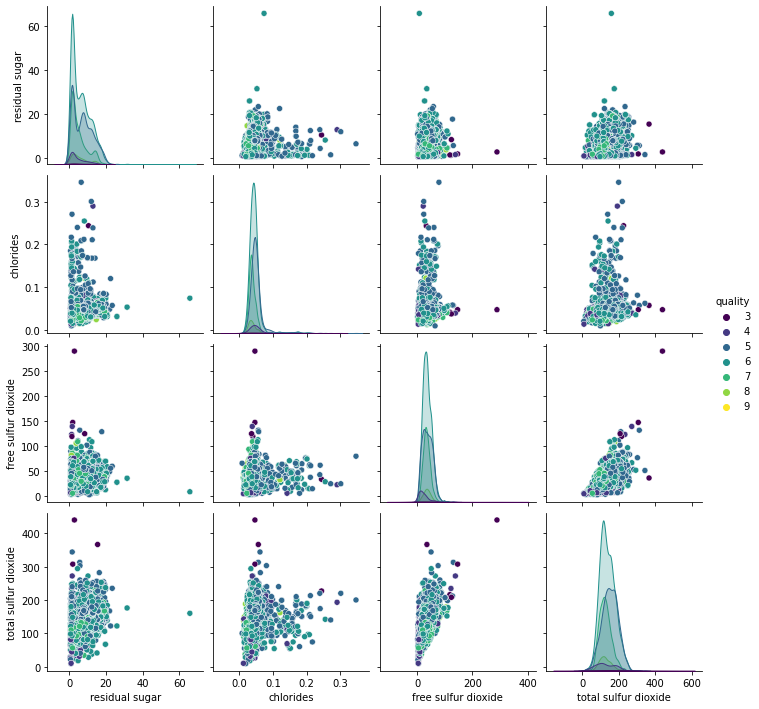

In [ ]:
sns.pairplot(data=white_wine_df, vars=["residual sugar", "chlorides","free sulfur dioxide","total sulfur dioxide"], hue="quality",palette="viridis", diag_kind="kde" )

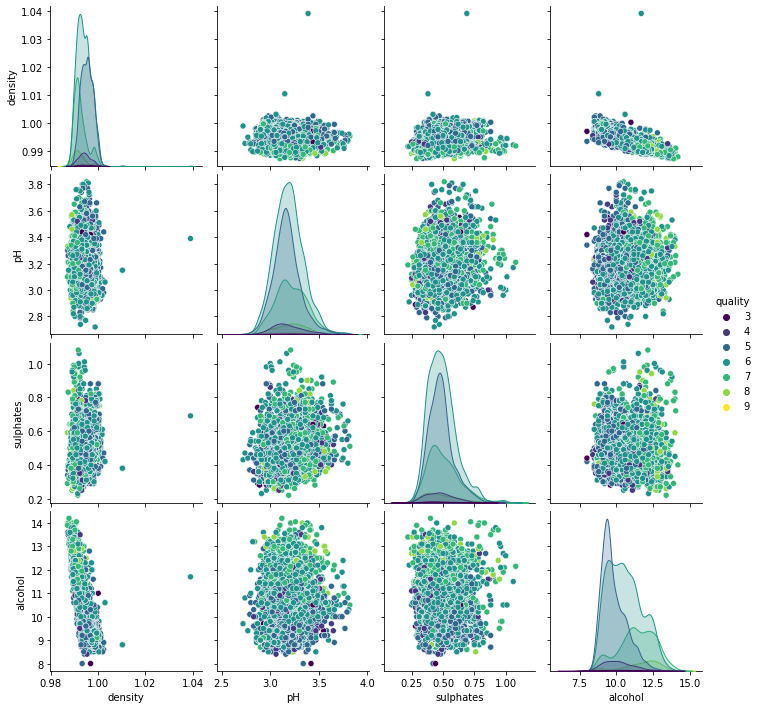

In [ ]:
sns.pairplot(data=white_wine_df, vars=["density","pH","sulphates","alcohol"], hue="quality",palette="viridis", diag_kind="kde")

#Encoding "quality" columnn

In [ ]:
white_wine_df["quality"] =white_wine_df["quality"].astype(int)
white_wine_df = pd.get_dummies(white_wine_df, columns=["quality"])

In [ ]:
white_wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0,0,0,1,0,0,0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0,0,0,1,0,0,0
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0,0,0,1,0,0,0
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0,0,0,1,0,0,0
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,white,5.7,0.21,0.32,0.9,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,0,0,0,1,0,0,0
4893,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0,0,0,1,0,0,0
4894,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0,0,1,0,0,0,0
4896,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0,0,0,0,1,0,0


In [ ]:
independant_var_ww  = white_wine_df.iloc[:,1:12].values # first columns

dependant_var_ww = white_wine_df.iloc[:,12:].values # last columns

In [ ]:
independant_var_ww  = preprocessing.normalize(independant_var_ww, axis = 0) #normalization

X_train,X_test,y_train,y_test = model_selection.train_test_split(independant_var_ww,dependant_var_ww,test_size=0.2, random_state=0)

#Trying Outliers removal methods (did not help)

In [ ]:
# # identify outliers in the training dataset with IsolationForest
# iso = IsolationForest(contamination=0.1)
# outliers = iso.fit_predict(X_train)

In [ ]:
# #identify outliers with Minimum Covariance Determinant
# ee = EllipticEnvelope(contamination=0.01)
# outliers = ee.fit_predict(X_train)

In [ ]:
# # identify outliers with Local Outlier Factor
# lof = LocalOutlierFactor()
# outliers = lof.fit_predict(X_train)

In [ ]:
# # identify outliers in the training dataset with One-Class SVM
# ee = OneClassSVM(nu=0.01)
# outliers = ee.fit_predict(X_train)

In [ ]:
# mask = outliers != -1
# X_train, y_train = X_train[mask, :], y_train[mask]

In [ ]:
# # summarize the shape of the updated training dataset
# print(X_train.shape, y_train.shape)

(3855, 10) (3855,)


#Building ANN

In [ ]:
ww_ann = tf.keras.Sequential()

In [ ]:
ww_ann.add(tf.keras.layers.Dense(units=15, activation="relu"))

In [ ]:
ww_ann.add(tf.keras.layers.Dense(units=15, activation="relu"))

In [ ]:
ww_ann.add(tf.keras.layers.Dense(units=15, activation="relu"))

In [ ]:
ww_ann.add(tf.keras.layers.Dense(units=7, activation="softmax"))


#Compile ANN

In [ ]:
ww_ann.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["categorical_accuracy"]) #savieno slāņu kopā

#Train ANN

In [ ]:
ww_ann.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
122/122 [==============================] - 1s 3ms/step - loss: 1.6735 - categorical_accuracy: 0.4399 - val_loss: 1.3309 - val_categorical_accuracy: 0.4702
Epoch 2/100
122/122 [==============================] - 0s 2ms/step - loss: 1.3168 - categorical_accuracy: 0.4435 - val_loss: 1.2905 - val_categorical_accuracy: 0.4702
Epoch 3/100
122/122 [==============================] - 0s 2ms/step - loss: 1.2986 - categorical_accuracy: 0.4435 - val_loss: 1.2857 - val_categorical_accuracy: 0.4702
Epoch 4/100
122/122 [==============================] - 0s 2ms/step - loss: 1.2957 - categorical_accuracy: 0.4435 - val_loss: 1.2874 - val_categorical_accuracy: 0.4702
Epoch 5/100
122/122 [==============================] - 0s 2ms/step - loss: 1.2928 - categorical_accuracy: 0.4435 - val_loss: 1.2868 - val_categorical_accuracy: 0.4702
Epoch 6/100
122/122 [==============================] - 0s 2ms/step - loss: 1.2924 - categorical_accuracy: 0.4435 - val_loss: 1.2883 - val_categorical_accuracy: 0.470

#Validate ANN Result

In [ ]:
preds = ww_ann.evaluate(x = X_test, y = y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

31/31 [==============================] - 0s 1ms/step - loss: 1.1626 - categorical_accuracy: 0.5298

Loss = 1.162585973739624
Test Accuracy = 0.5297741293907166


#Red Wine

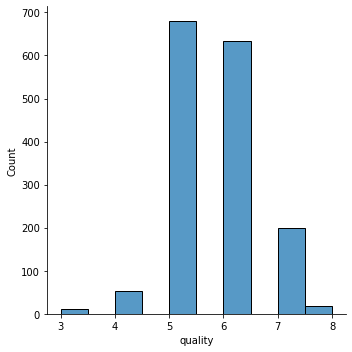

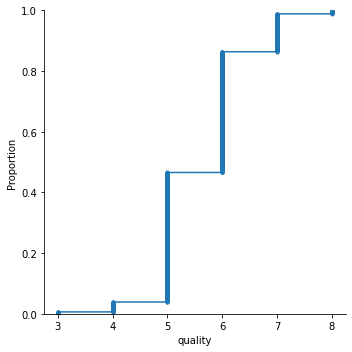

In [ ]:
sns.displot(red_wine_df["quality"], bins=10)
sns.displot(red_wine_df, x="quality", kind="ecdf", marker='.')

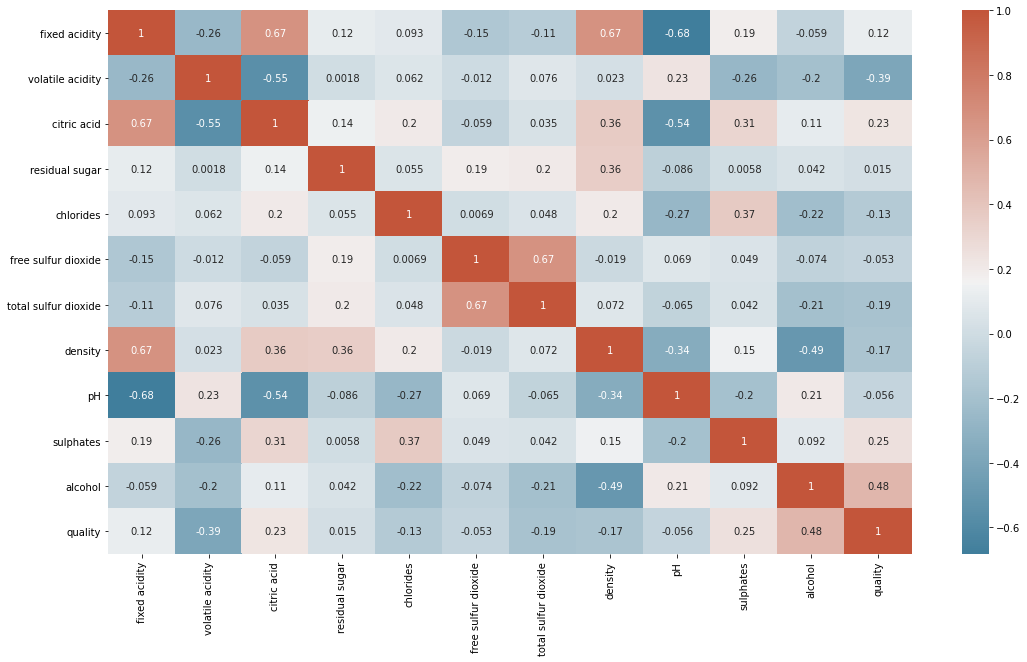

In [ ]:
plt.figure(figsize=(18, 10))

sns.heatmap(red_wine_df.corr(),annot=True, cmap=sns.diverging_palette(230, 20, as_cmap=True))

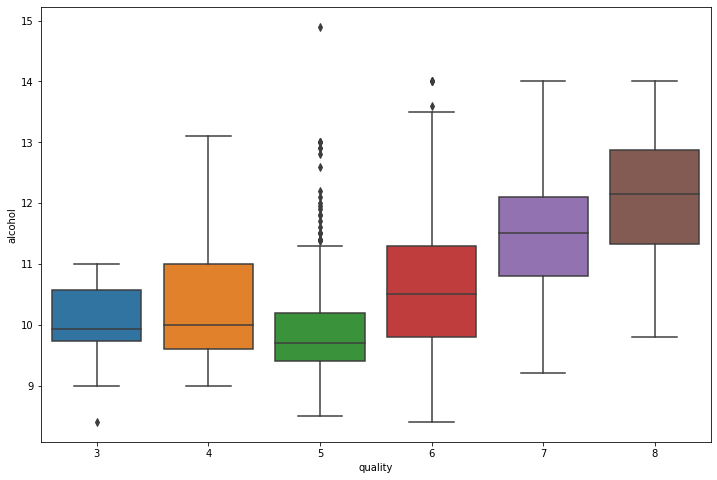

In [ ]:
#check alcohol vs quality
plt.figure(figsize=(12, 8))

sns.boxplot(data=red_wine_df, y="alcohol", x="quality")

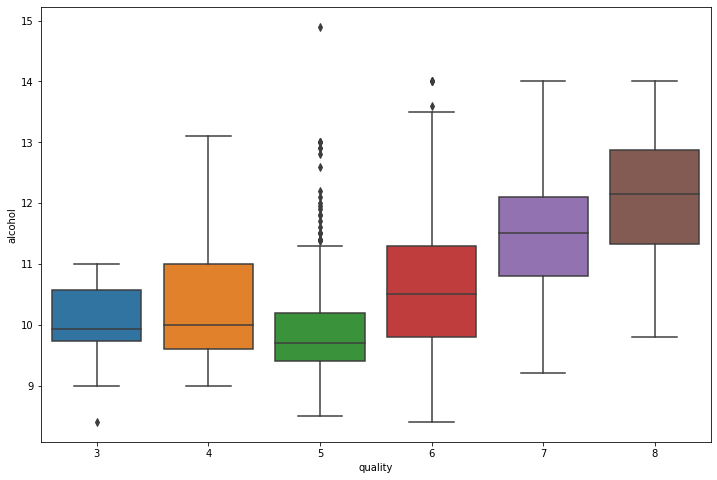

In [ ]:
#check acidity vs quality
plt.figure(figsize=(12, 8))

sns.boxplot(data=red_wine_df, y="alcohol", x="quality")

In [ ]:
red_wine_df = df[df["type"] == "red"].dropna()

#Encoding "quality" columnn

In [ ]:
red_wine_df["quality"] =red_wine_df["quality"].astype(int)
red_wine_df = pd.get_dummies(red_wine_df, columns=["quality"])

In [ ]:
red_wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8
4898,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0,1,0,0,0
4899,red,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,0,1,0,0,0
4900,red,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,0,1,0,0,0
4901,red,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,0,0,1,0,0
4902,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,0,0,0,1,0,0
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,0,1,0,0,0
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0,0,0,1,0,0
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,0,1,0,0,0


In [ ]:
independant_var_rw  = red_wine_df.iloc[:,1:12].values # first columns

dependant_var_rw = red_wine_df.iloc[:,12:].values # last columns

In [ ]:
independant_var_rw  = preprocessing.normalize(independant_var_rw, axis = 0) #normalization

X_train,X_test,y_train,y_test = model_selection.train_test_split(independant_var_rw,dependant_var_rw,test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1274, 11) (1274, 6) (319, 11) (319, 6)


#Building ANN

In [ ]:
rw_ann = tf.keras.Sequential()

In [ ]:
rw_ann.add(tf.keras.layers.Dense(units=15, activation="relu"))

In [ ]:
rw_ann.add(tf.keras.layers.Dense(units=15, activation="relu"))

In [ ]:
rw_ann.add(tf.keras.layers.Dense(units=15, activation="relu"))

In [ ]:
rw_ann.add(tf.keras.layers.Dense(units=6, activation="softmax"))


#Compile ANN

In [ ]:
rw_ann.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["categorical_accuracy"])

#Train ANN

In [ ]:
rw_ann.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
40/40 [==============================] - 1s 6ms/step - loss: 1.7366 - categorical_accuracy: 0.4089 - val_loss: 1.6651 - val_categorical_accuracy: 0.4201
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 1.5713 - categorical_accuracy: 0.4286 - val_loss: 1.4434 - val_categorical_accuracy: 0.4201
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 1.3435 - categorical_accuracy: 0.4105 - val_loss: 1.2412 - val_categorical_accuracy: 0.4169
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 1.2263 - categorical_accuracy: 0.3893 - val_loss: 1.1933 - val_categorical_accuracy: 0.4169
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 1.1967 - categorical_accuracy: 0.4246 - val_loss: 1.1829 - val_categorical_accuracy: 0.4201
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 1.1875 - categorical_accuracy: 0.4286 - val_loss: 1.1812 - val_categorical_accuracy: 0.4201
Epoch 7/10

#Validate ANN Result

In [ ]:
preds = rw_ann.evaluate(x = X_test, y = y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

10/10 [==============================] - 0s 1ms/step - loss: 1.0293 - categorical_accuracy: 0.5705

Loss = 1.0292625427246094
Test Accuracy = 0.5705329179763794
